#### 2.	Produce descriptive statistics and plots describing the individual variables and their pairwise associations with one another. Pay particular attention to the associations of income and annual savings with all other variables. Comment on the results. Is there anything particularly interesting? Is there anything that doesn’t make sense? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
df_clean = pd.read_pickle('data/customer_data_modified.pkl')

In [3]:
df = df_clean.drop(columns=['cust_unique_id', 'gender', 'ethnicity_group', 'geo_region'])


<table>
<tr>
<th>gender</th>
<th>ethnicity group</th>
<th> geo region </th>
</tr>
<tr>
<td>

```
9999     0
F        1
M        2
Other    3 
```
</td>
<td>


```
Afro-Carribbean    0
Other              1
South Asian        2
White British      3
White Other        4
```
</td>
<td>

```
Midlands     0
North        1
Scotland     2
Southeast    3
Southwest    4
Wales        5
```
</td>
</tr>
</table>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4972 entries, 7 to 30304
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4972 non-null   int64  
 1   gender_cat              4972 non-null   int64  
 2   ethnicity_group_cat     4972 non-null   int64  
 3   geo_region_cat          4972 non-null   int64  
 4   net_salary              4972 non-null   float64
 5   other_income            4972 non-null   float64
 6   observed_income         4972 non-null   float64
 7   housing_spend           4972 non-null   float64
 8   childcare_spend         4972 non-null   float64
 9   gambling_spend          4972 non-null   float64
 10  observed_surplus        4972 non-null   float64
 11  credit_score            4972 non-null   float64
 12  savings_bal_lbg         4972 non-null   float64
 13  annual_net_savings_lbg  4972 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 582.7

In [5]:
# get a list of numerical and categorical variables
num_cols = list(df.select_dtypes('float64'))
num_cols.append('age')
print(num_cols)
cat_cols = list(df.select_dtypes('int64'))
cat_cols.remove('age')
print(cat_cols)
                

['net_salary', 'other_income', 'observed_income', 'housing_spend', 'childcare_spend', 'gambling_spend', 'observed_surplus', 'credit_score', 'savings_bal_lbg', 'annual_net_savings_lbg', 'age']
['gender_cat', 'ethnicity_group_cat', 'geo_region_cat']


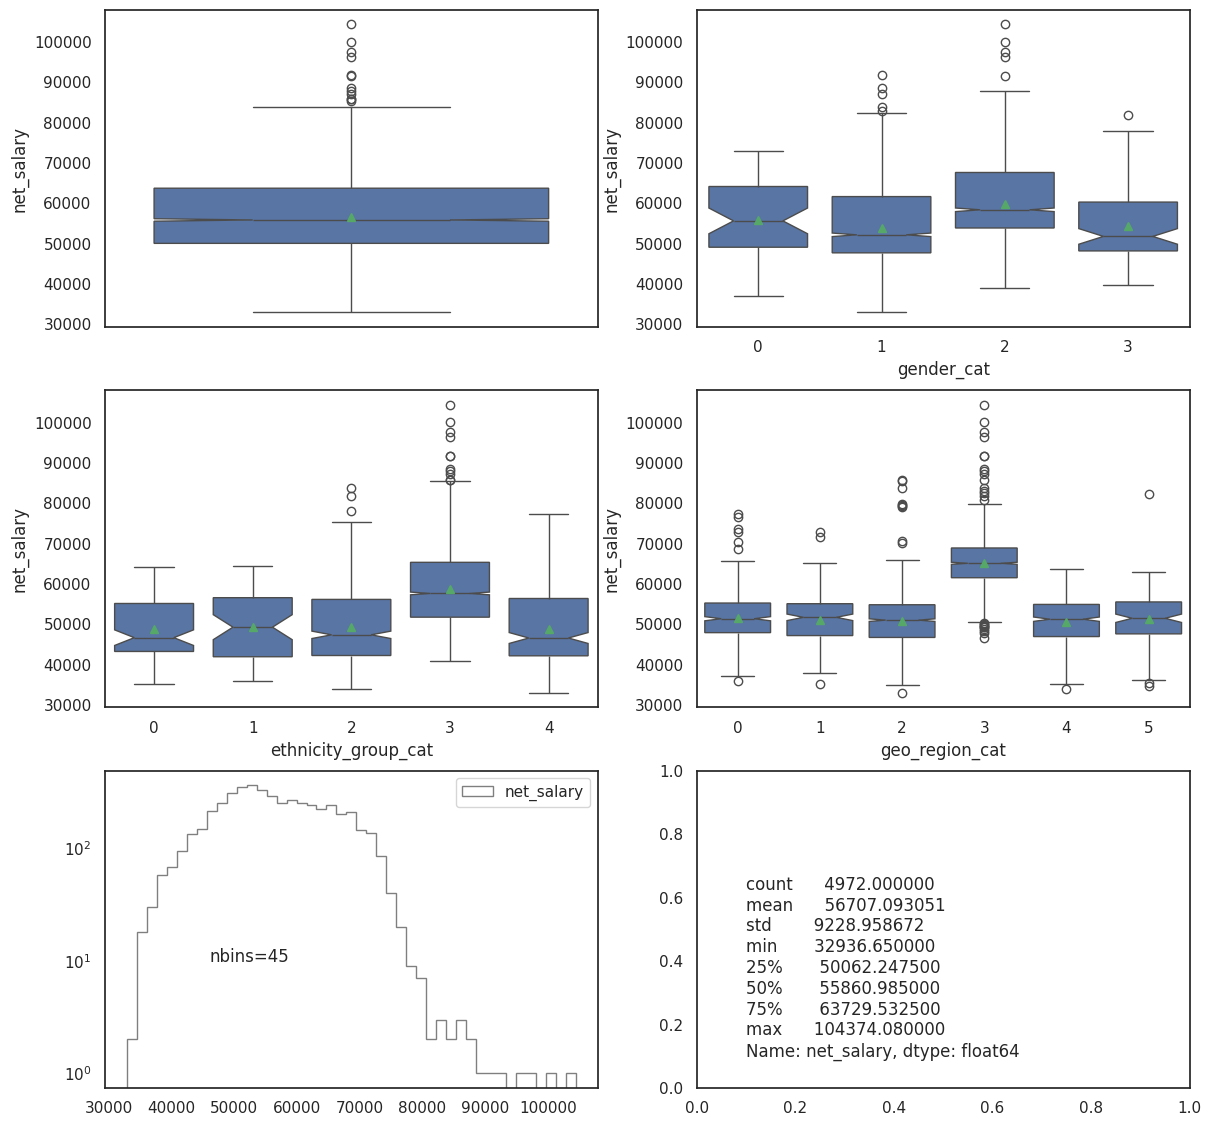

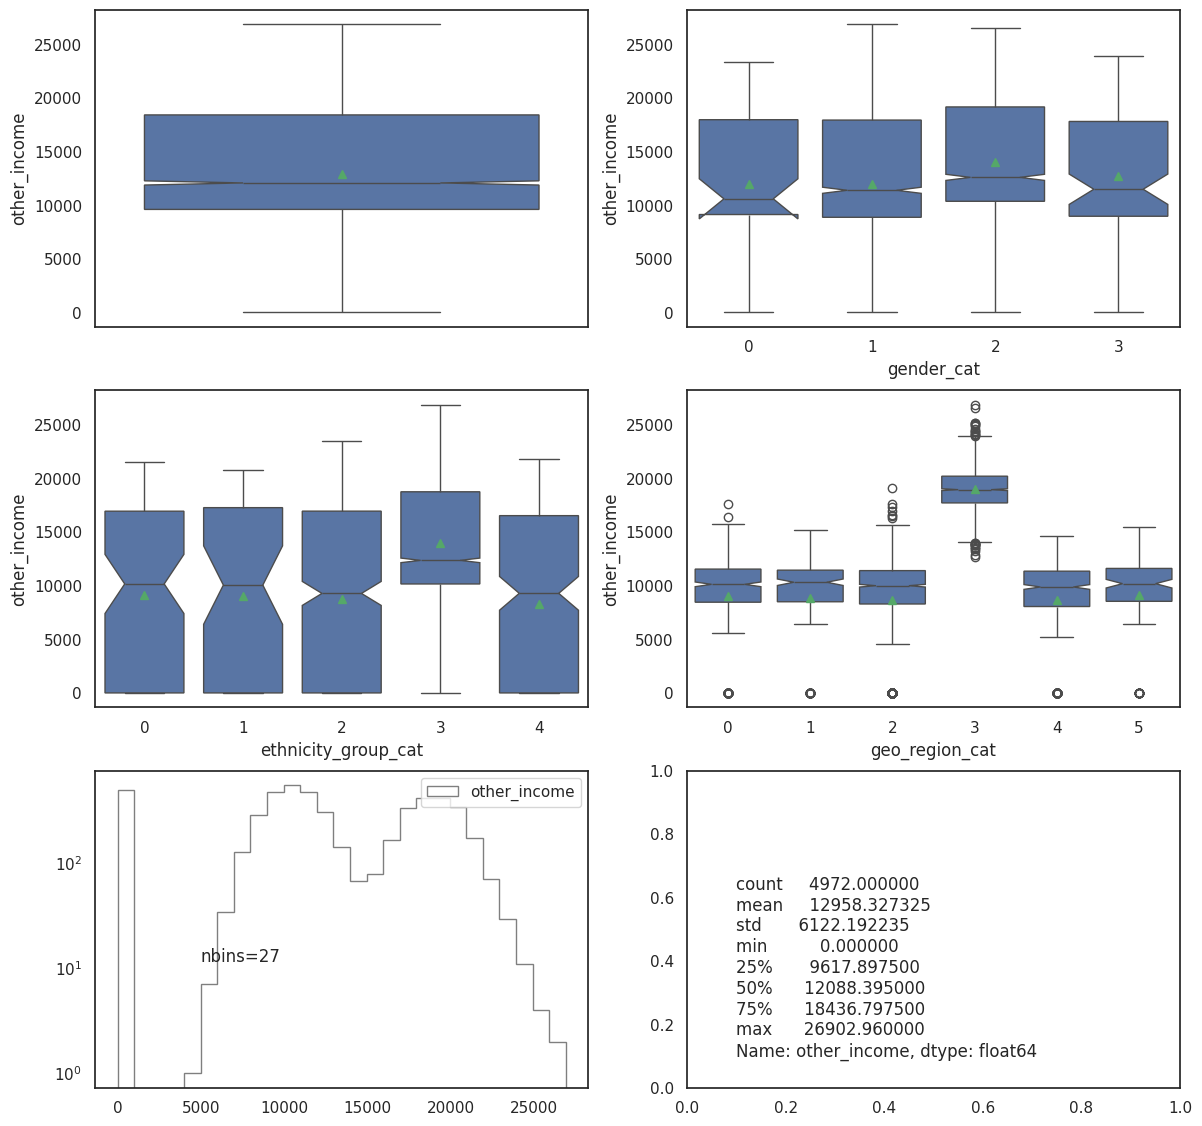

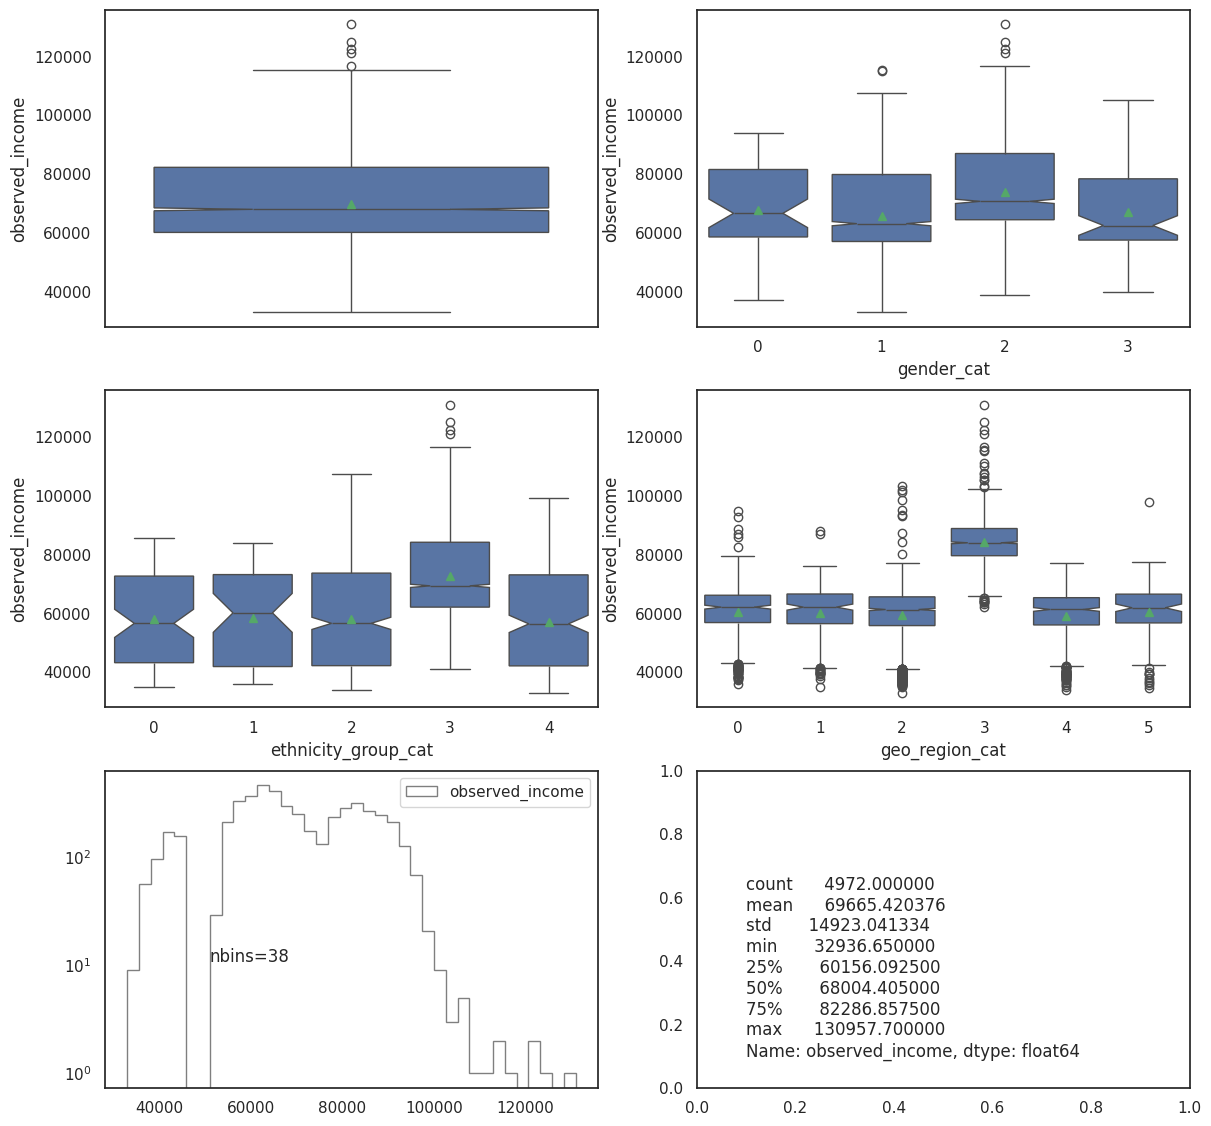

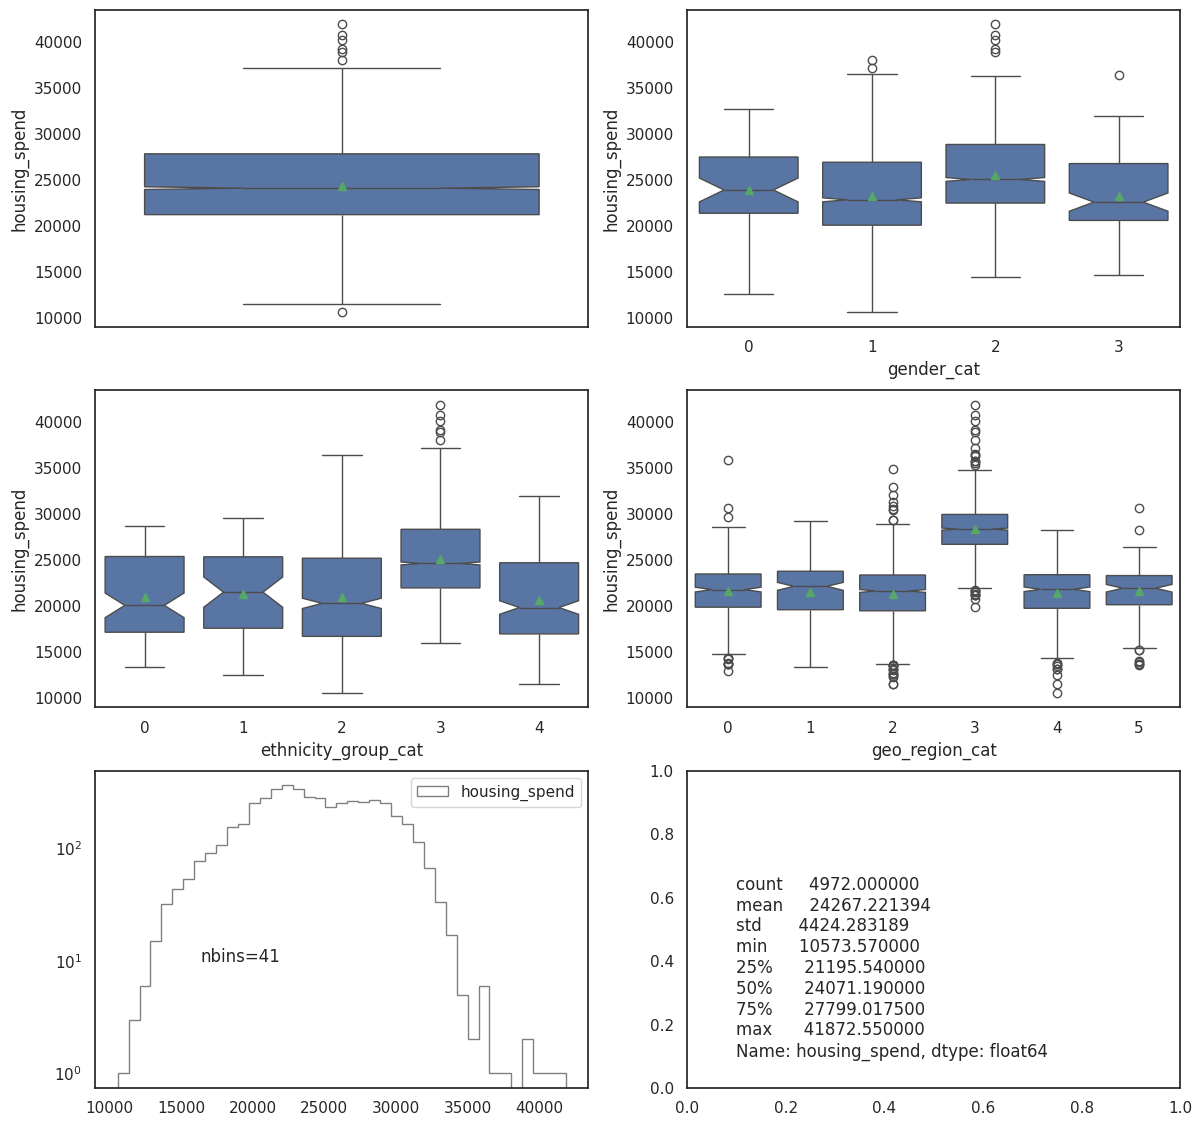

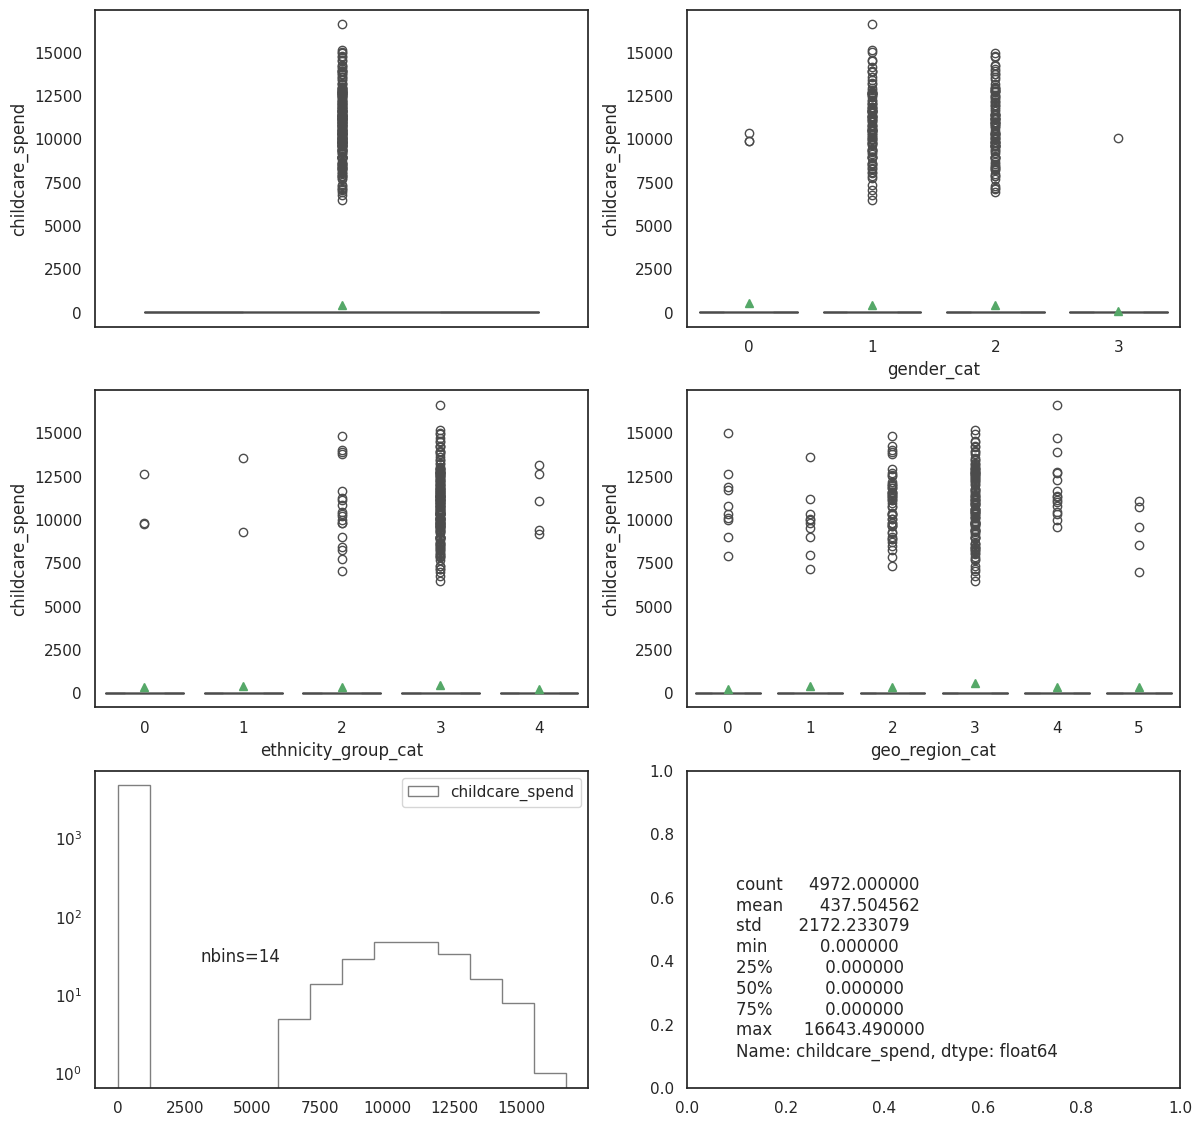

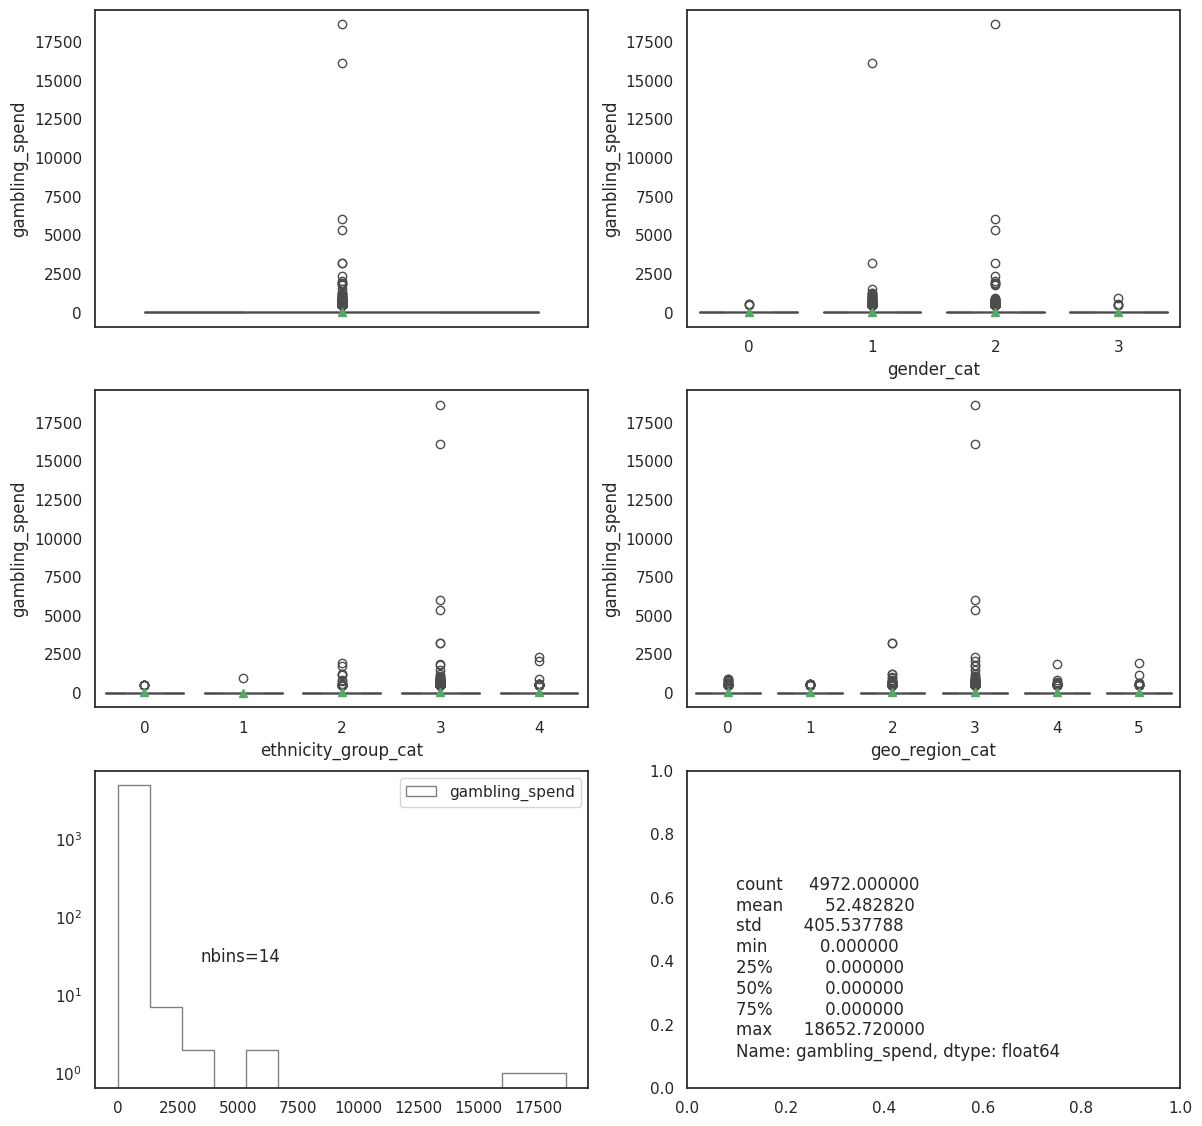

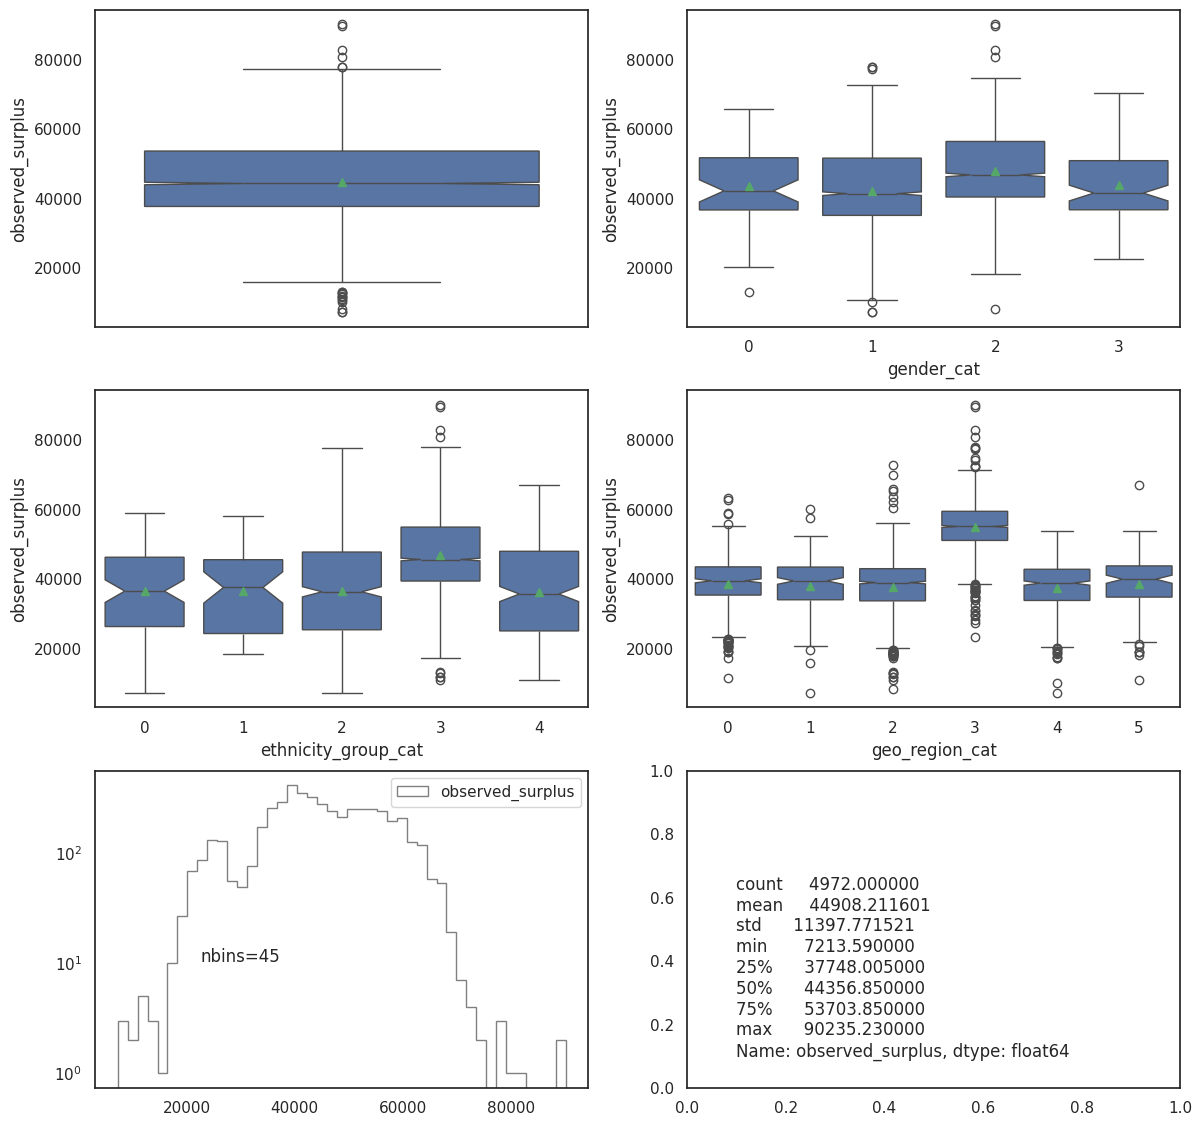

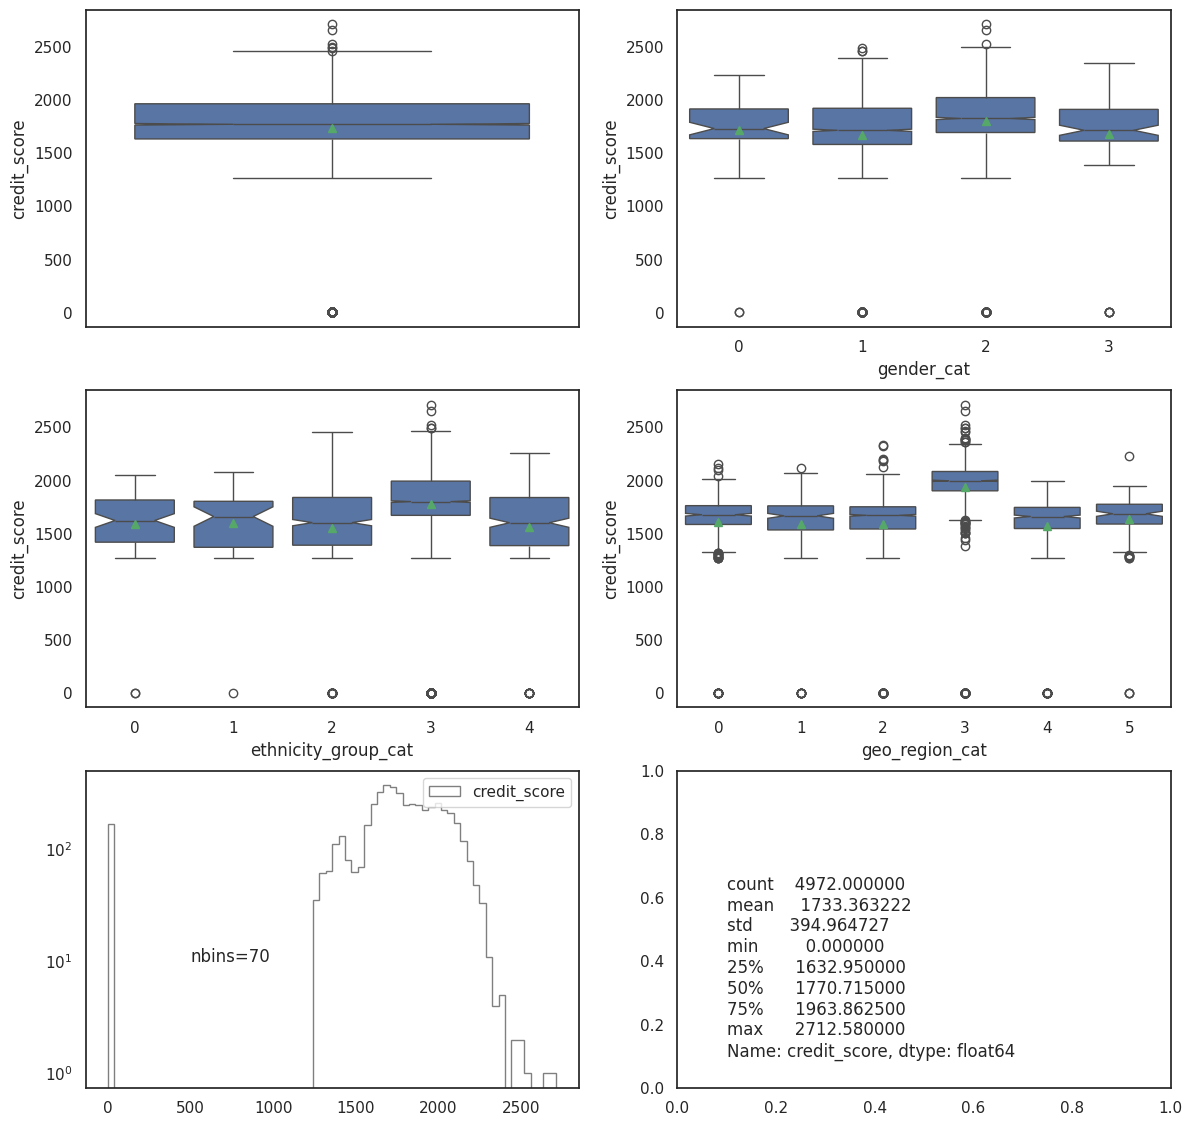

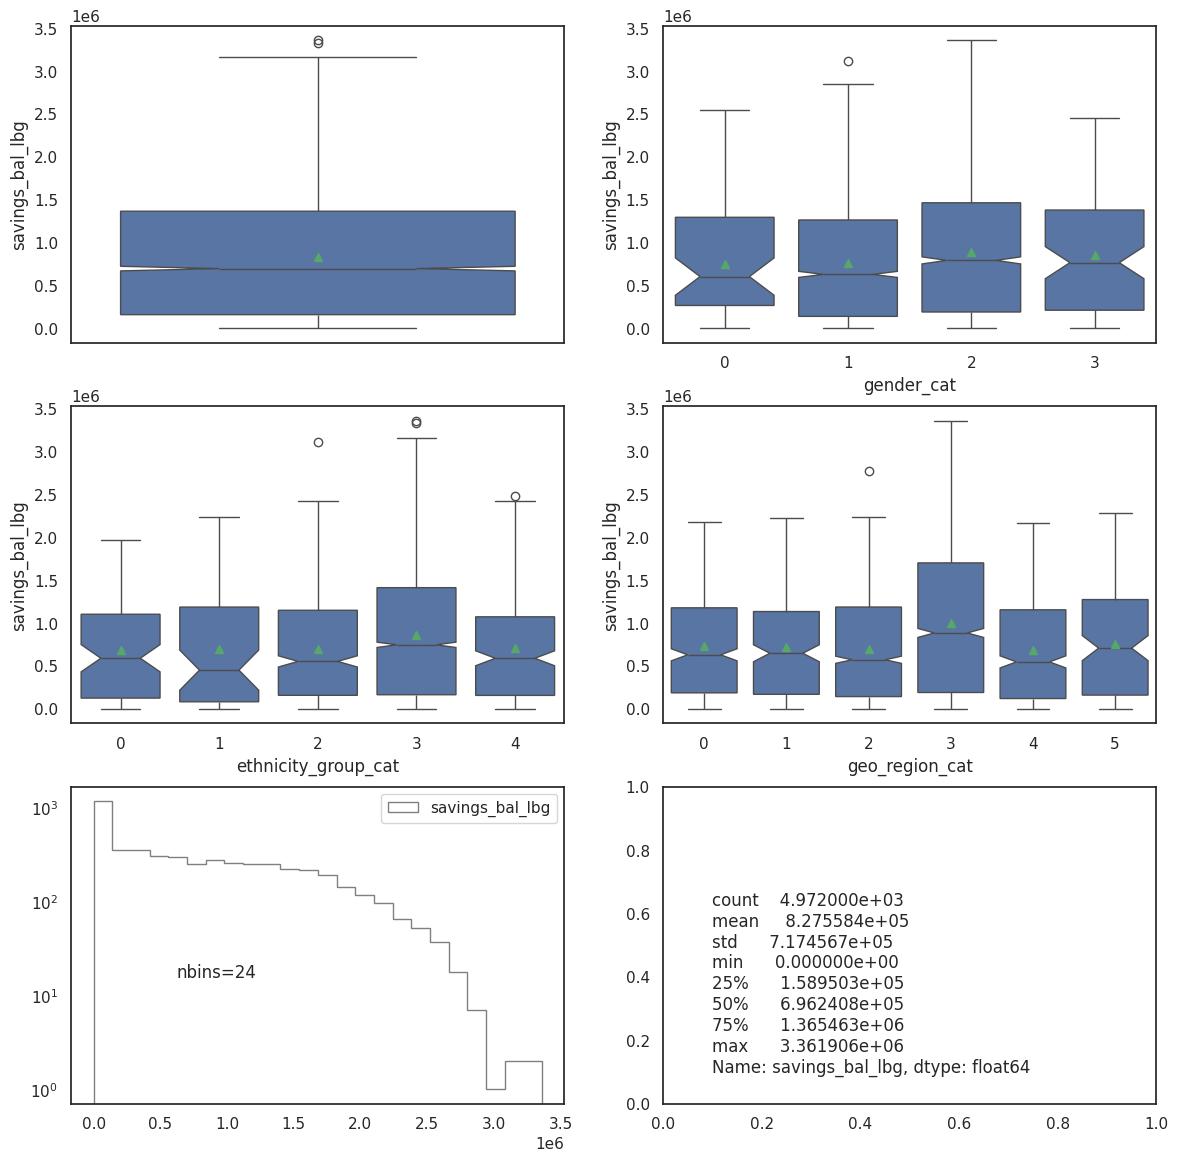

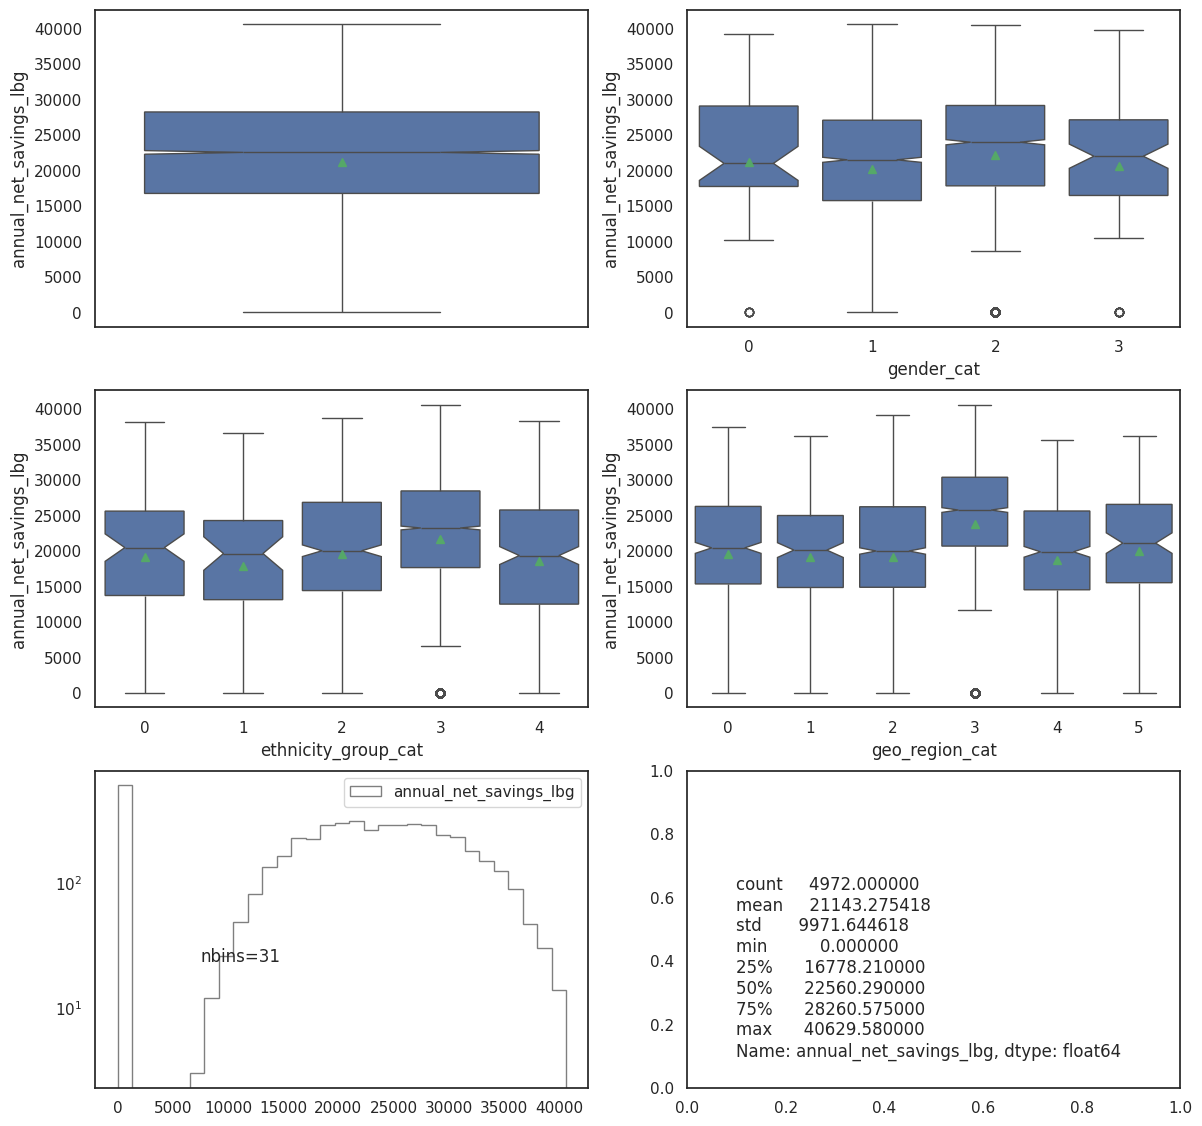

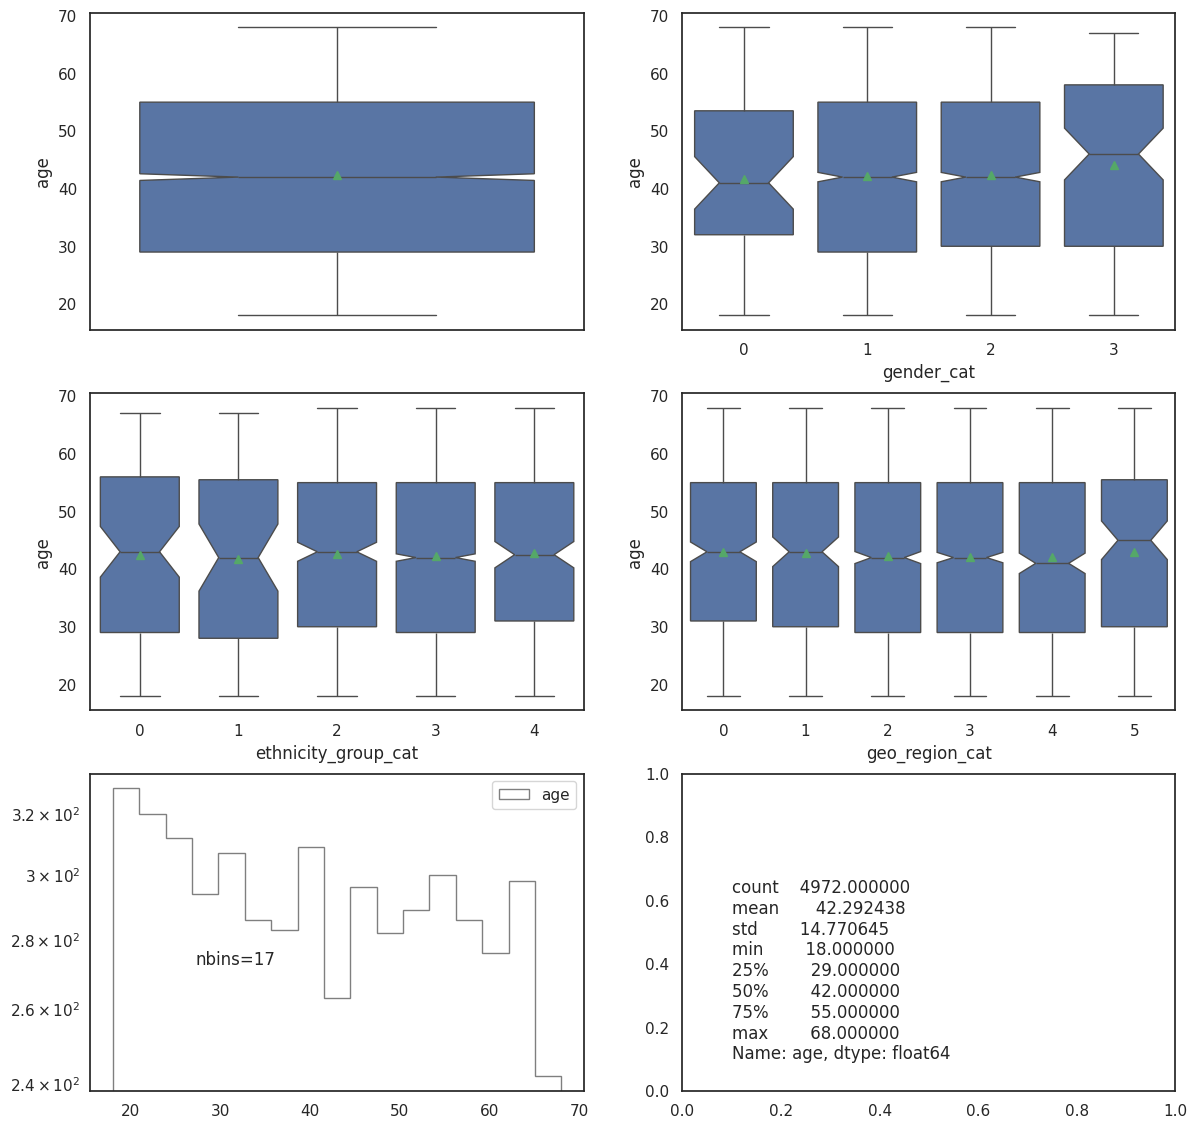

In [58]:
# lets take a look at the variability of the numerical vairables - combined & seperated in categories 
for col in num_cols:
    plt.figure(figsize=(14,14))
    plt.tight_layout()
    sns.set(style='white')
    plt.subplot(321)
    sns.boxplot(y=df[col], notch=True, showmeans=True)
    plt.subplot(322)
    sns.boxplot(y=df[col], x = df['gender_cat'], notch=True, showmeans=True)
    plt.subplot(323)
    sns.boxplot(y=df[col], x = df['ethnicity_group_cat'], notch=True, showmeans=True)
    plt.subplot(324)
    sns.boxplot(y=df[col], x = df['geo_region_cat'], notch=True, showmeans=True)
    plt.subplot(325)
    hist = plt.hist(df[col], density=False, alpha=0.5, label=col,histtype='step', stacked=True, color='black', log=True, bins='auto')
    # plt.locator_params(axis='x', nbins=len(hist[0]))
    plt.figtext(0.2,0.2, f'nbins={len(hist[0])}')
    plt.legend(loc='upper right')
    plt.subplot(326)
    plt.text(0.1, 0.1, f"{df[col].describe()}")

    

### What is shown in the plots?

* Each numerical variable is shown in a box plot showing the Mean (<span style="color:green"> green triangle </span>), median (with **uncertainty calculated at 95% CL** represented by the notch) along with the range, 25%, 75% percentiles and the outliers.
* The distibution of the same numerical variable is shown as histogram with **y-axis set to logarithmic scale** . Note, no effort has been made to optimize the binning for each distribution, instead, the matplotlib automtic binning algorithm is used. The number of bins used in each case is shown on the plot. This approach is good enough since I am only interested in overall distribution of the variables at this point. 
* The values of count, mean, standard deviation, median, min, max, 25% and 75% percentiles are also shown 
* Finally, the numerical variable is compared categorized in gender, ethnicity group and geo region in the box plots  

### Observations:

* Inespecting all the variables, the data quality is good and there is no obvious discrepancy. The outliers observed are part of the data and should be used for modeling and prediction 


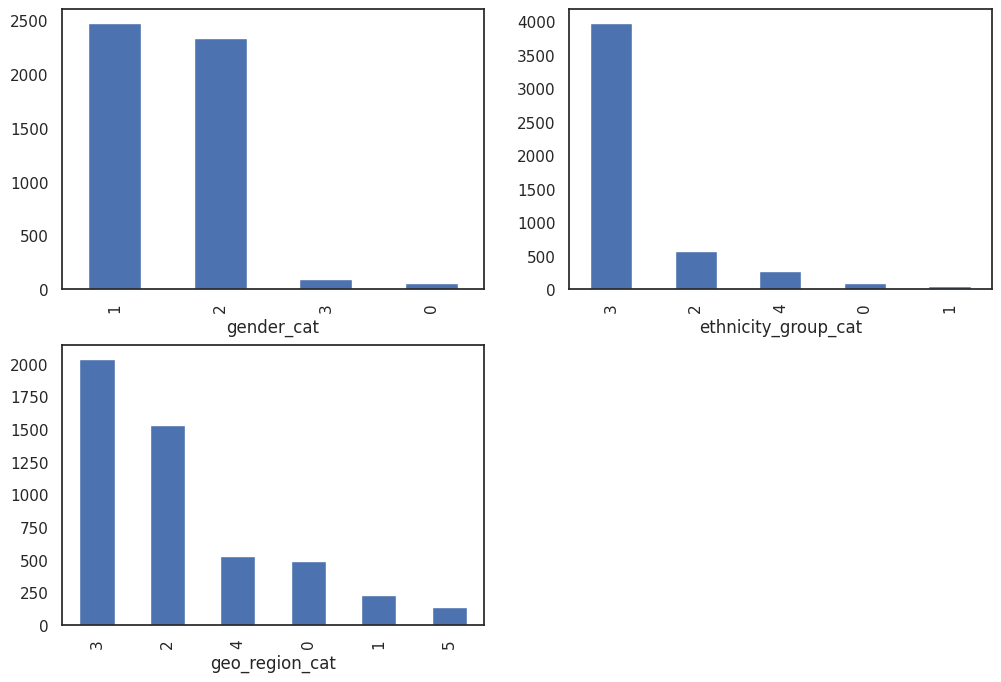

In [65]:
# take a look at the counts of categorical variables
plt.figure(figsize=(12, 8)) 
for i, col in enumerate(cat_cols):
    ax = 220+i+1
    plt.subplot(ax)
    df[col].value_counts().plot(kind='bar')

The distributions in various categories and probably reflective of the population.But if predictions were to made in these categories ideally we would want uniform number of samples across these categories 

# Pairwise correlations

<Axes: >

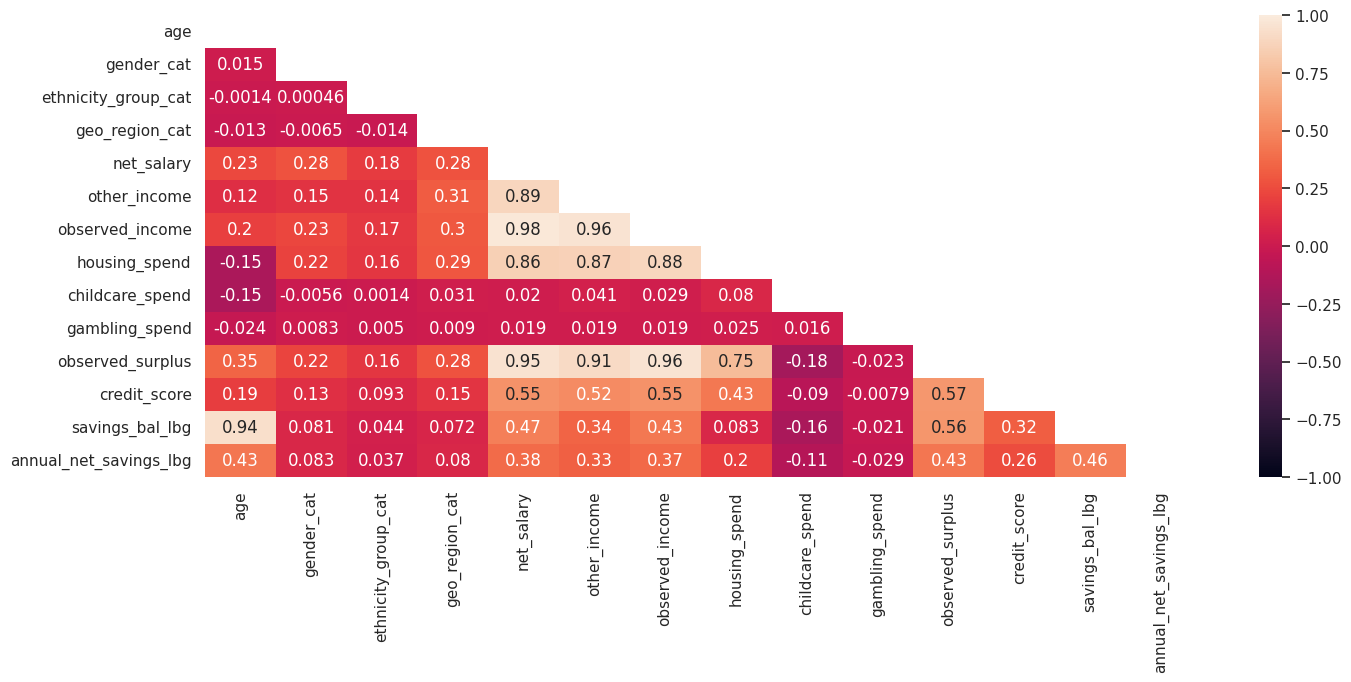

In [7]:
# lets look at the correlation co-efficients
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmin= -1, vmax= 1, annot=True)

Text(0.5, 1.0, 'Feature correlation with income')

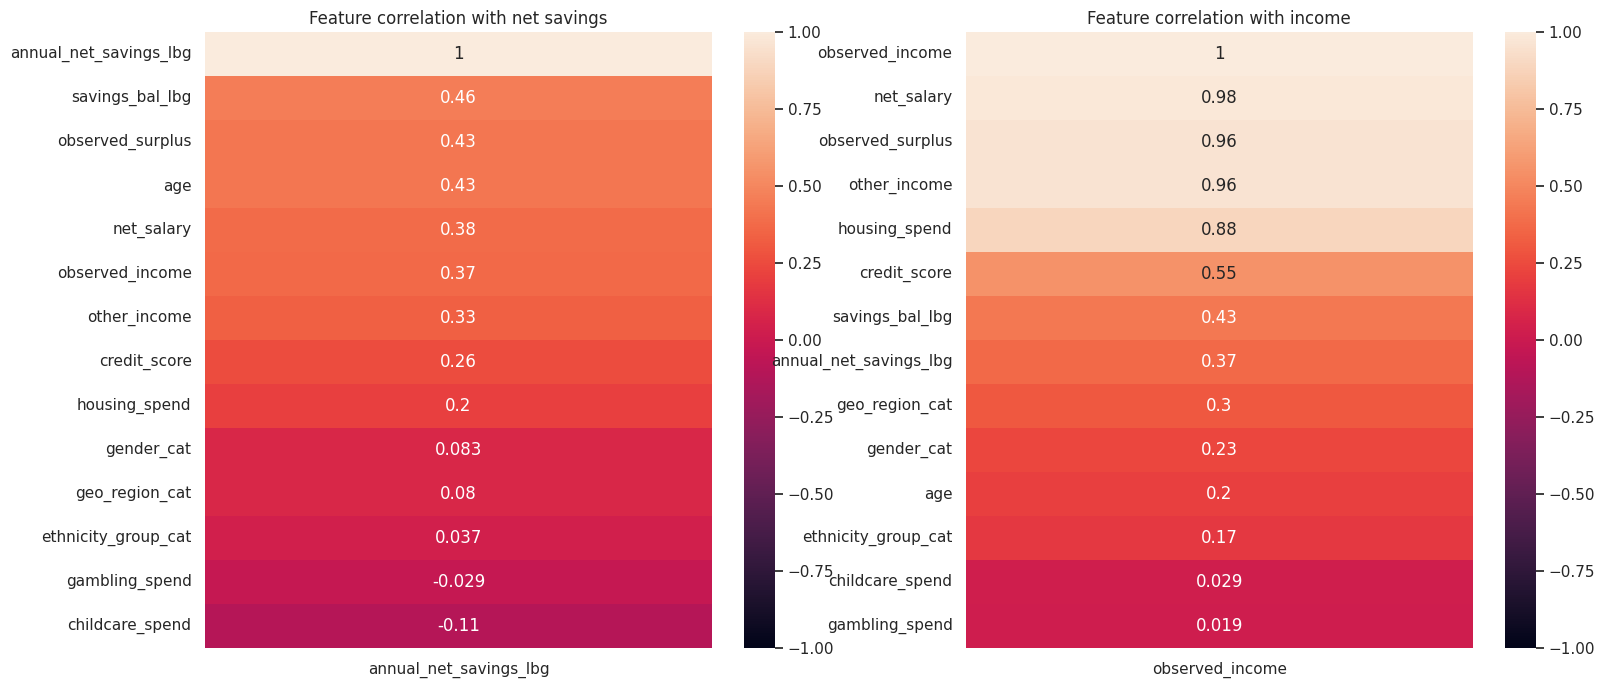

In [13]:
plt.figure(figsize=(18,8))
plt.subplot(121)
heatmap = sns.heatmap(df.corr()[['annual_net_savings_lbg']].sort_values(by='annual_net_savings_lbg', ascending=False), vmin= -1, vmax= 1, annot=True)
heatmap.set_title('Feature correlation with net savings')
plt.subplot(122)
heatmap = sns.heatmap(df.corr()[['observed_income']].sort_values(by='observed_income', ascending=False), vmin= -1, vmax= 1, annot=True)
heatmap.set_title('Feature correlation with income')

* Corrleation coefficients for each pair of input variables are shown above showing both the strength of correlation and direction (pos/neg). The correlation of each variable with income and net savings are also shown separtely and ranked in order of strength. 

* Correlation with observed_income: as expected net_salary, other_income is highly correlated with observed income.  Not surprisingly if someone has a high income they tend to have a higher surplus and spend more on housing. The correlation with credit score and saving balance also make sense. It is interesting to see the correlation with net saving is not as high as one might expect. Athough net savings is affected by various factors.  Some correlation of income with gender, ethnicity and geo location is also not surprising.  

* Correlation with net savings: Interesting to see gender, ethnicity and geo location has little correlation on net savings. Correlation with credit_score is not as strong as one might expect - indicating not everyone in the UK borrows even though they have good savings. As one gets older, one tend to save more for the future/retriement. As expected, observed income, surplus and previous savings balance all have positive corelations with net saving. 

* In general, the pairwise correlation all make sense. Interesting element is how the credit score is not as strongly correlated to net saving as it is to observed income. 